In [2]:
#http://www.scipy-lectures.org/packages/statistics/index.html
#https://pandas.pydata.org/pandas-docs/stable/visualization.html

import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn


data1=pd.read_excel('sogamoso.xlsx')
#data2=pd.read_excel('DescargaGuaduero.xlsx')
#data3=pd.read_excel('DescargaAlban.xlsx')
#data4=pd.read_excel('ReciboAlban.xlsx')
#data5=pd.read_excel('ReciboGuaduero.xlsx')
data1.head(5)


,TIME STAMP,MIL-PT-2001A
0,03/07/2019 00:00:00,1479.530518
1,03/07/2019 00:01:00,1478.674438
2,03/07/2019 00:02:00,1478.674438
3,03/07/2019 00:03:00,1478.674438
4,03/07/2019 00:04:00,1478.117920


In [3]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267585 entries, 0 to 267584
Data columns (total 2 columns):
TIME STAMP      267585 non-null object
MIL-PT-2001A    267585 non-null float64
dtypes: float64(1), object(1)
memory usage: 4.1+ MB


In [4]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)
#data1.quantile(0.9995)
doutput=data1.describe(percentiles=[.25, .5, .75, .95, .99, .999])
doutput.to_excel("output.xlsx")
data1.describe(percentiles=[.25, .5, .75, .95, .99, .999])


,MIL-PT-2001A
count,267585.000000
mean,1320.848562
std,193.268139
min,100.001755
25%,1240.762695
50%,1338.958008
75%,1440.834473
95%,1574.986450
99%,1610.992349
99.9%,1664.638379


TypeError: unhashable type: 'numpy.ndarray'

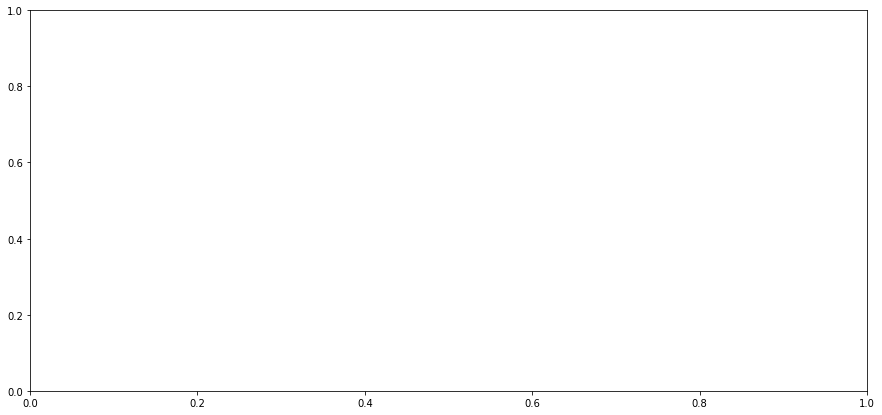

In [5]:
#https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html
import datetime

headers = data1.dtypes.index

for i in range(data1.shape[1]-1):
    plt.figure(figsize=(15, 7))
    plt.plot(data1.iloc[:,[0]], data1.iloc[:,[i+1]], '.',markersize=2,color="k")
    plt.grid(True)
    plt.xlabel('Tiempo')
    plt.ylabel(headers[i+1])  
    plt.xlim([datetime.date(2019, 3, 20), datetime.date(2019, 5, 7)])
    #plt.title(headers[i+1])
    #plt.setp(ax1.get_xticklabels(), visible=False)
    plt.xticks(rotation=45)
    plt.savefig('{}_A-tiempo.png'.format(i))
    plt.show()
    plt.close()
    
    
#data.plot('time stamp', 'Descarga Medellín L10', 'style = ".")
#plt.figure(figsize=(15, 7))
#plt.plot(data1.iloc[:,[0]], data1.iloc[:,[5]],'.',markersize=1,color="k")
#plt.setp(ax1.get_xticklabels(), visible=False)
#plt.xticks(rotation=90)
#plt.axhline(y=110,linewidth=2, color='#2ca02c')
#plt.axhline(y=216,linewidth=2, color='#2ca02c')
#plt.axhline(y=810,linewidth=2, color='#2ca02c')
#plt.savefig('fig1.png', dpi = 300)
    


In [8]:
print(data1.iloc[:,[5]])

       analog.GAL-PT-2400A.curval - Presion de succion sistema de bombeo L10 BUC
0      245.189606                                                               
1      245.505615                                                               
2      244.908707                                                               
3      244.592697                                                               
4      243.995773                                                               
5      243.082855                                                               
6      240.379211                                                               
7      241.608139                                                               
8      245.189606                                                               
9      245.821625                                                               
10     245.189606                                                               
11     244.908707           

In [6]:
import datetime

data2=data1
data2['datetime'] = pd.to_datetime(data2['TIME STAMP'], format="%d.%m.%Y %H:%M:%S")

data2.set_index('datetime', inplace=True)

headers = data2.dtypes.index
    
    
for i in range(data2.shape[1]-1):
    plt.figure(figsize=(15, 7))
    plt.plot(data2[data2.columns[i+1]], '.',markersize=2,color="k")
    plt.grid(True)
    plt.xlabel('Tiempo')
    ticklabels = data2.index.strftime('%Y-%m-%d')
    plt.ylabel(headers[i+1])
    
    plt.xlim([datetime.date(2019, 3, 20), datetime.date(2019, 5, 17)])
    
    #plt.title(headers[i+1])
    #plt.setp(ax1.get_xticklabels(), visible=False)
    plt.xticks(rotation=45)
    plt.savefig('{}_A-tiempo.png'.format(i))
    plt.show()
    plt.close()



ValueError: time data '03/07/2019 00:00:00' does not match format '%d.%m.%Y %H:%M:%S' (match)

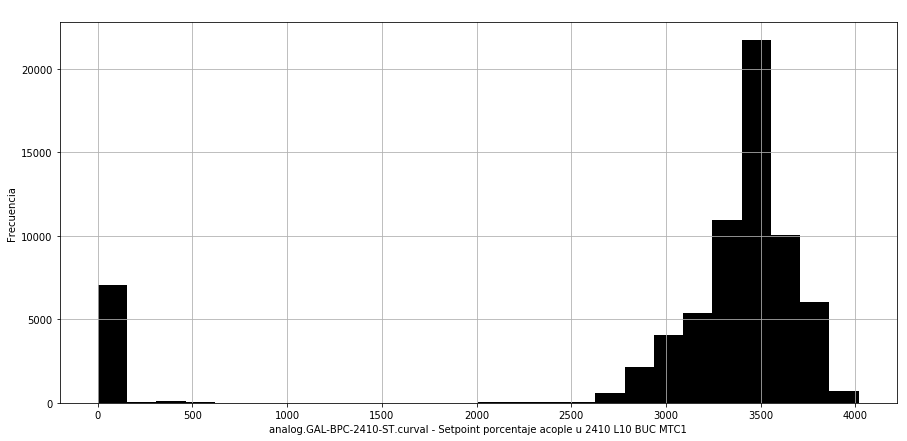

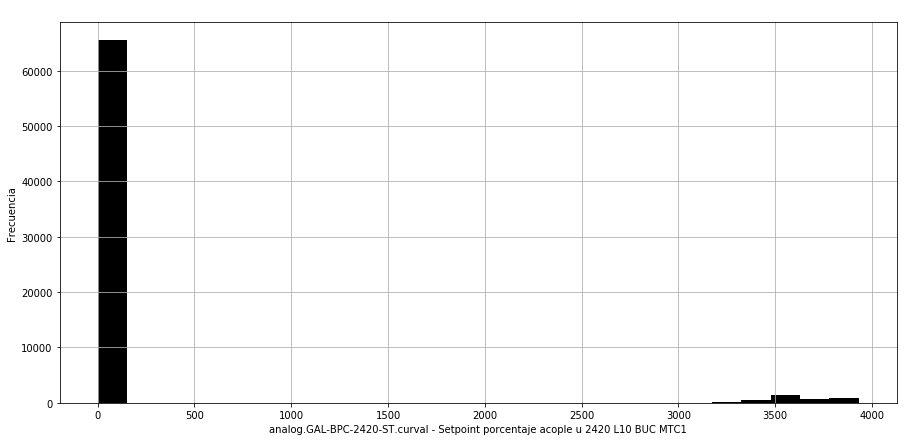

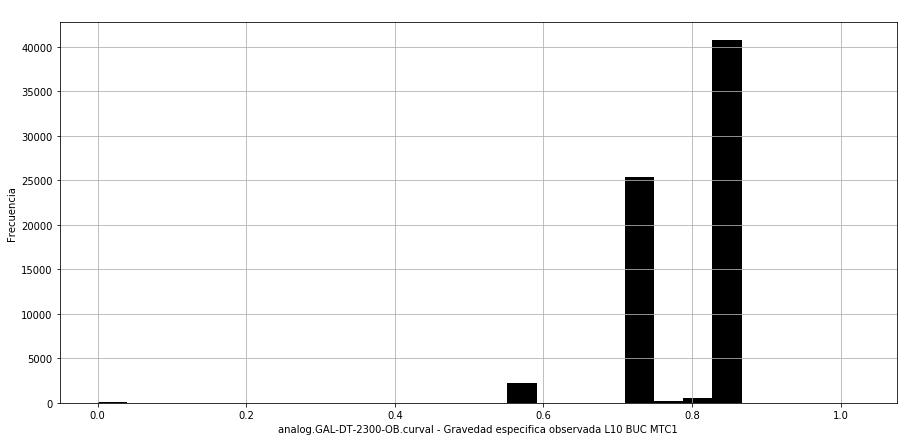

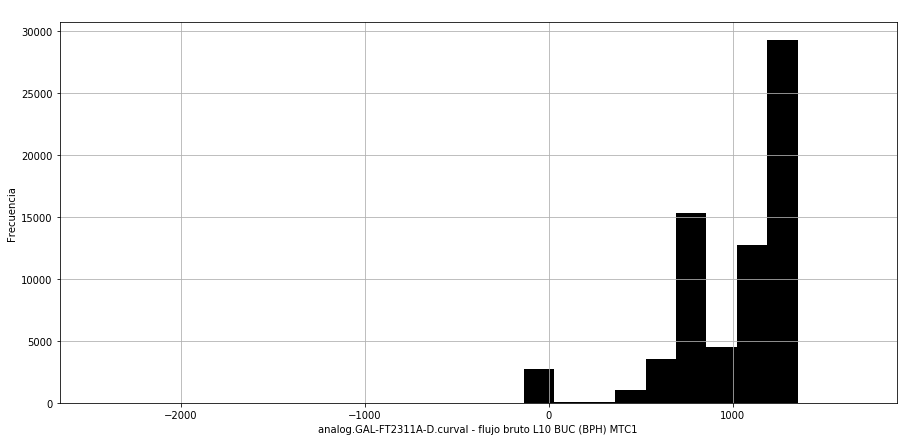

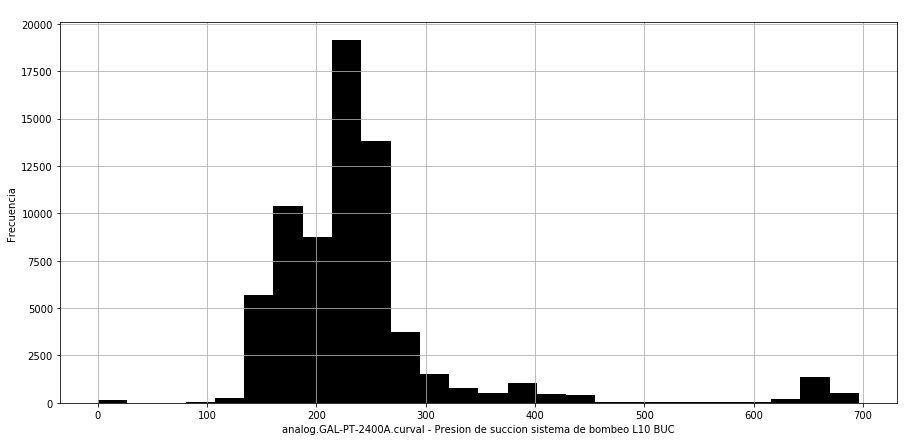

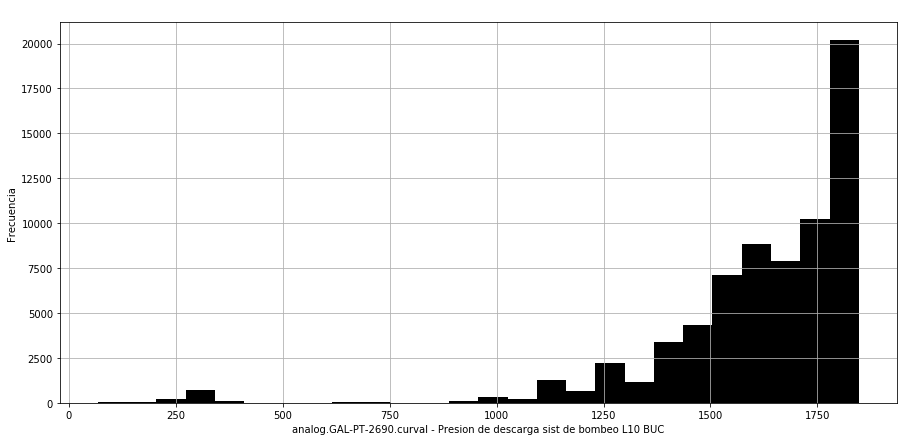

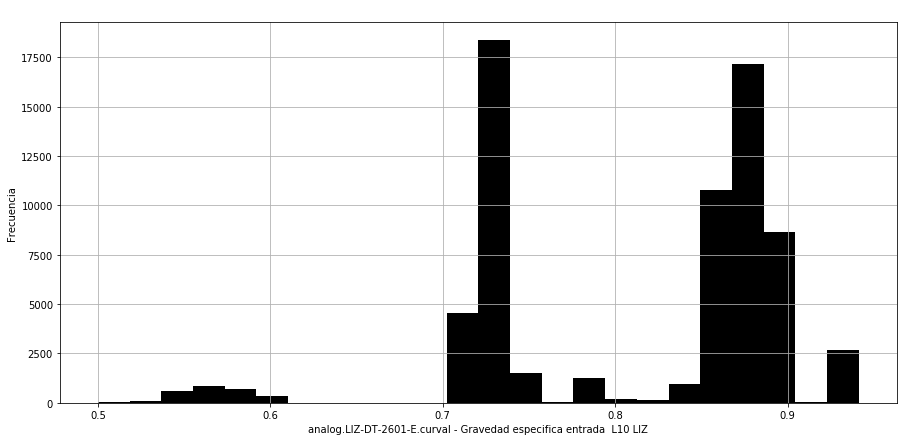

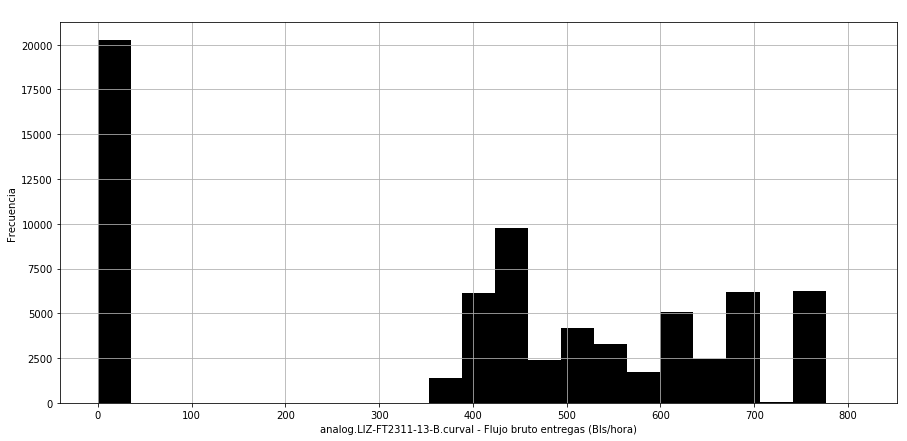

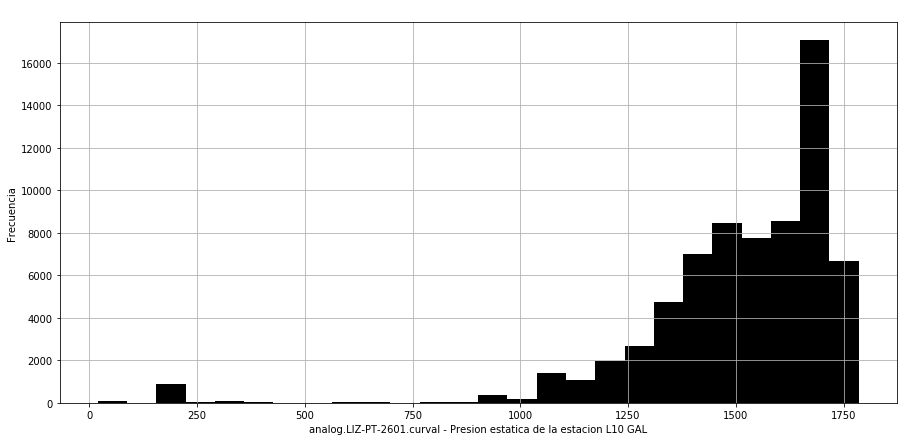

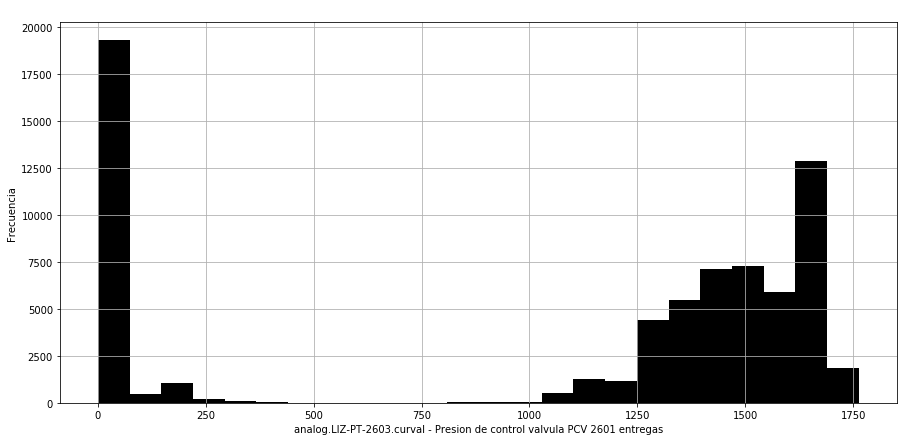

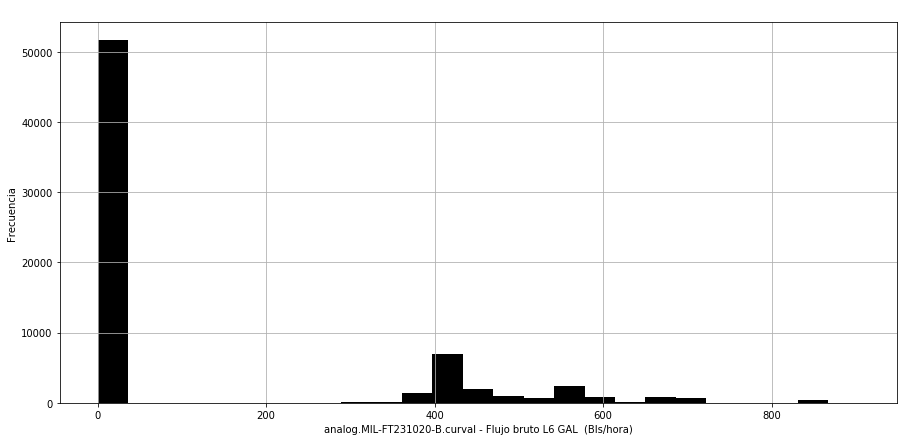

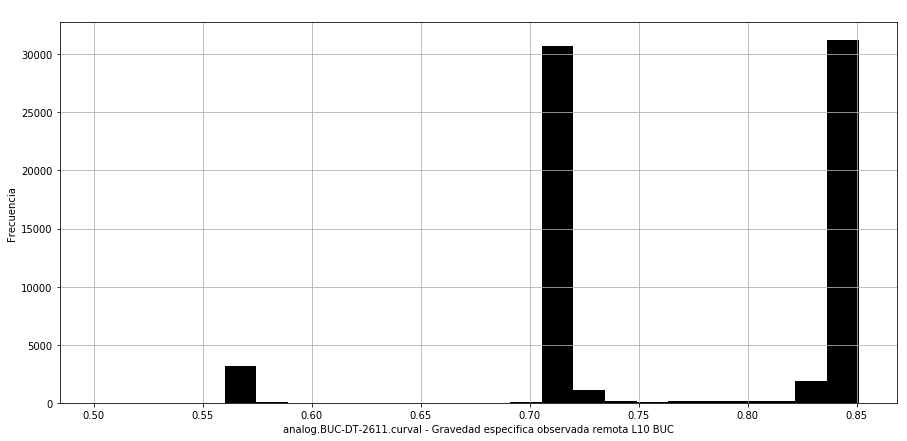

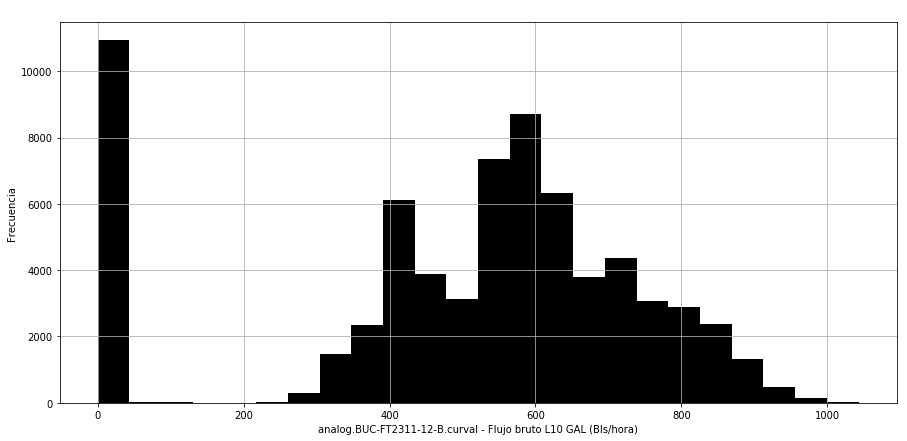

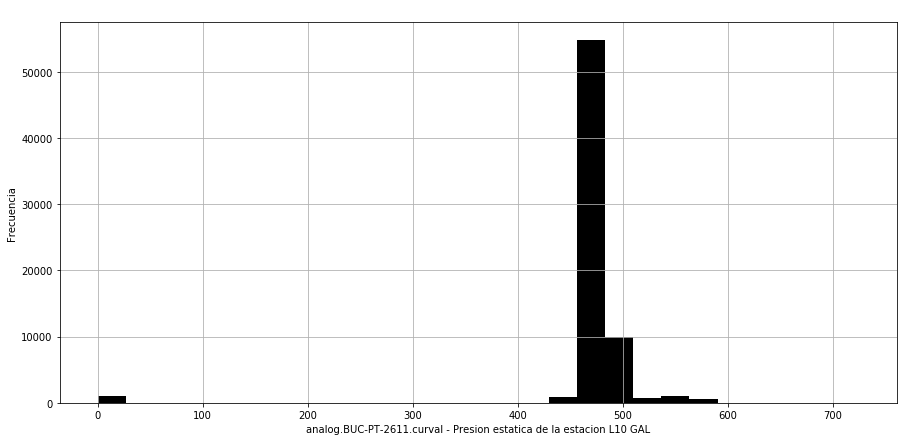

In [13]:
#https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram.html
#https://matplotlib.org/gallery/pyplots/pyplot_text.html#sphx-glr-gallery-pyplots-pyplot-text-py

#plt.title('Histogram of IQ')
#plt.axis([0, 1700, 0, 1])
#plt.grid(True)

for i in range(data1.shape[1]-1):
    #plt.figure(figsize=(15, 7))
    data2.iloc[:,[i+1]].hist(bins='doane', figsize=(15, 7), density=False, cumulative=False,color="k") # bins='auto', bins='fd'. Maximum of the ‘sturges’ and ‘fd’ estimators. Provides good all around performance.
    plt.grid(True)
    plt.title(' ')
    plt.xlabel(headers[i+1])
    plt.ylabel('Frecuencia')  
    #plt.title(headers[i+1])
    #plt.setp(ax1.get_xticklabels(), visible=False)
    #plt.xticks(rotation=45)
    plt.savefig('{}_B-histograma.png'.format(i))
    plt.show()
    plt.close()
    
    #CAMBIOS GUARDADOS 20190102:9:29PM



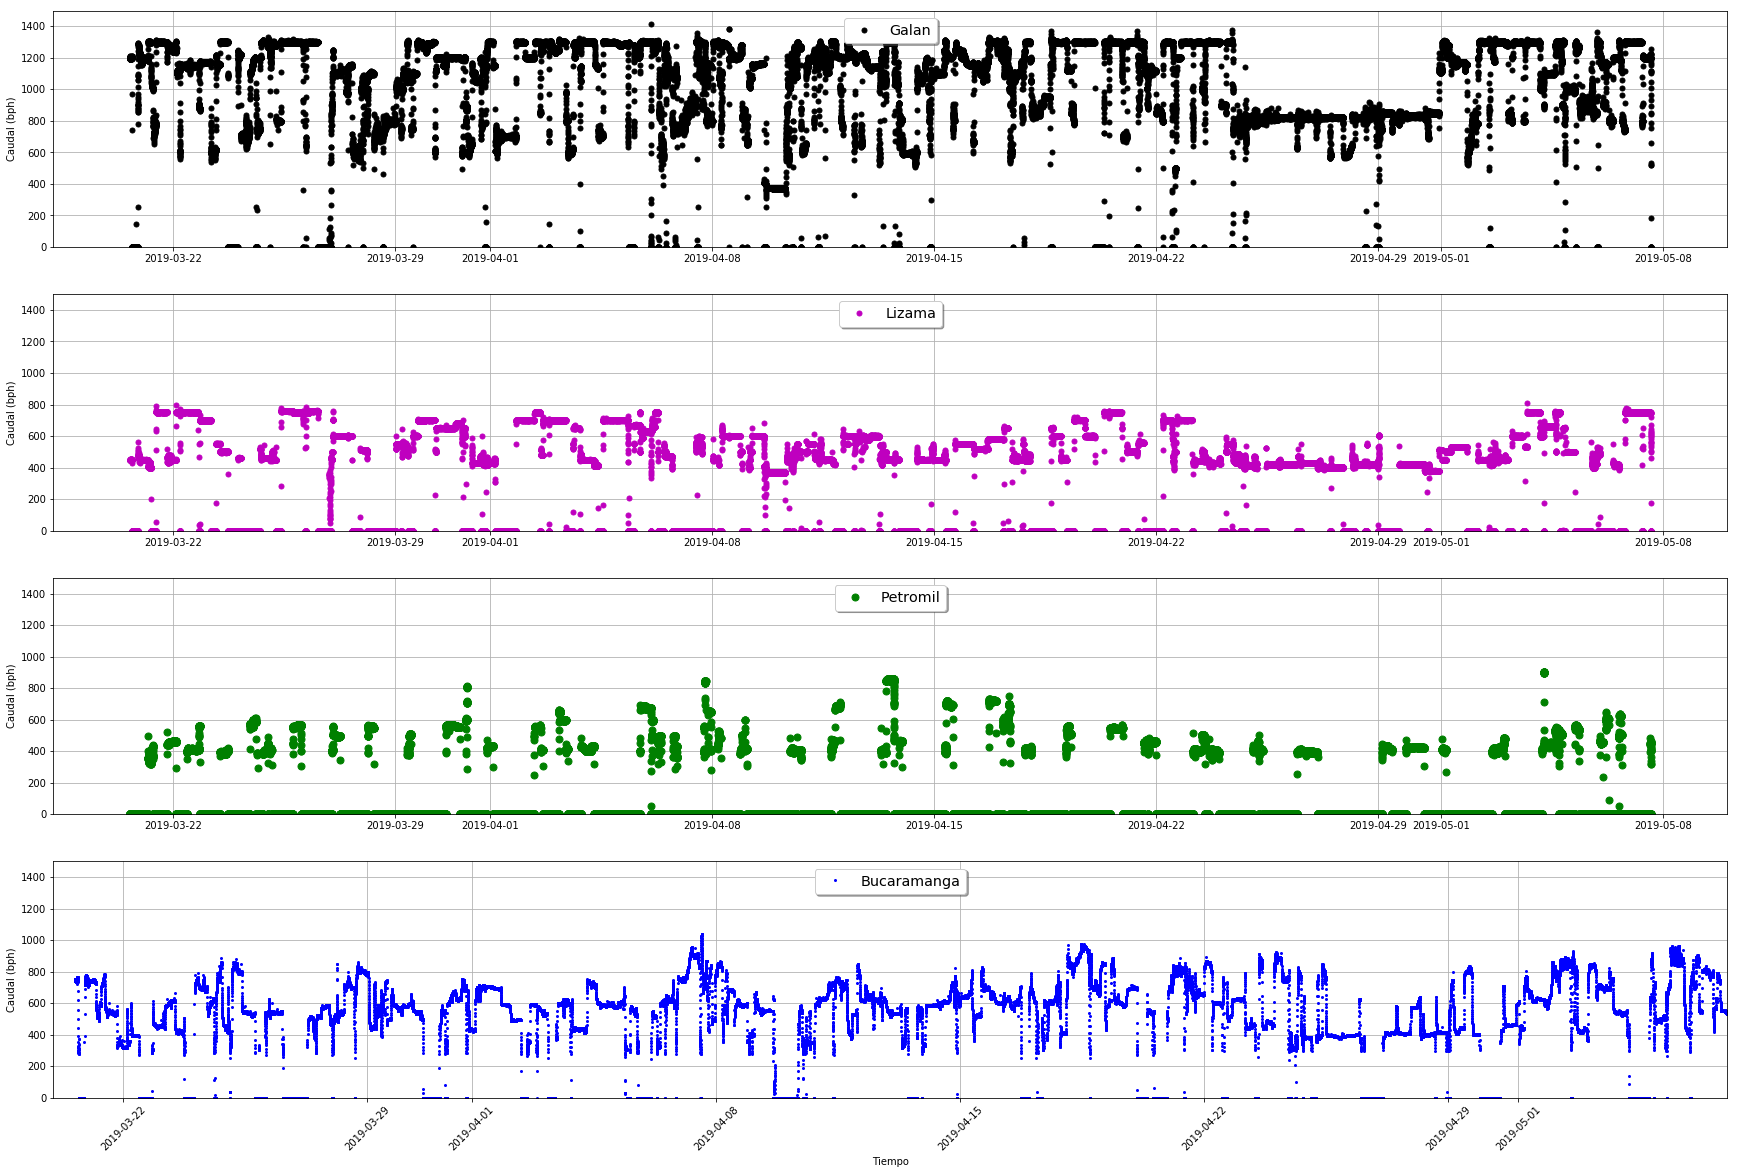

In [71]:
#https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html
import datetime

headers = data1.dtypes.index

plt.figure(figsize=(30, 20))

ax1 = plt.subplot(411)
plt.plot(data1.iloc[:,[0]], data1.iloc[:,[4]], 'o',markersize=5,color="k")
plt.ylim(0, 1500)
plt.grid(True)
plt.ylabel('Caudal (bph)')
plt.legend(['Galan'], loc='upper center', fontsize='x-large', shadow=True)

ax2 = plt.subplot(412, sharex=ax1)
plt.plot(data1.iloc[:,[0]], data1.iloc[:,[8]], 'o',markersize=5,color="m")
plt.ylim(0, 1500)
plt.grid(True)
plt.ylabel('Caudal (bph)')
plt.legend(['Lizama'], loc='upper center', fontsize='x-large', shadow=True)

ax3 = plt.subplot(413, sharex=ax1)
plt.plot(data1.iloc[:,[0]], data1.iloc[:,[11]], 'o',markersize=7,color="g")
plt.ylim(0, 1500)
plt.grid(True)
plt.ylabel('Caudal (bph)')
plt.legend(['Petromil'], loc='upper center', fontsize='x-large', shadow=True)

ax4 = plt.subplot(414)
plt.plot(data1.iloc[:,[0]], data1.iloc[:,[13]], 'o',markersize=2,color="b")
plt.ylim(0, 1500)
plt.grid(True)
plt.ylabel('Caudal (bph)')
plt.xlabel('Tiempo')
plt.xlim([datetime.date(2019, 3, 20), datetime.date(2019, 5, 7)])
plt.xticks(rotation=45)

plt.legend(['Bucaramanga'], loc='upper center', fontsize='x-large', shadow=True)
plt.savefig('flujos.png')
plt.show()
plt.close()

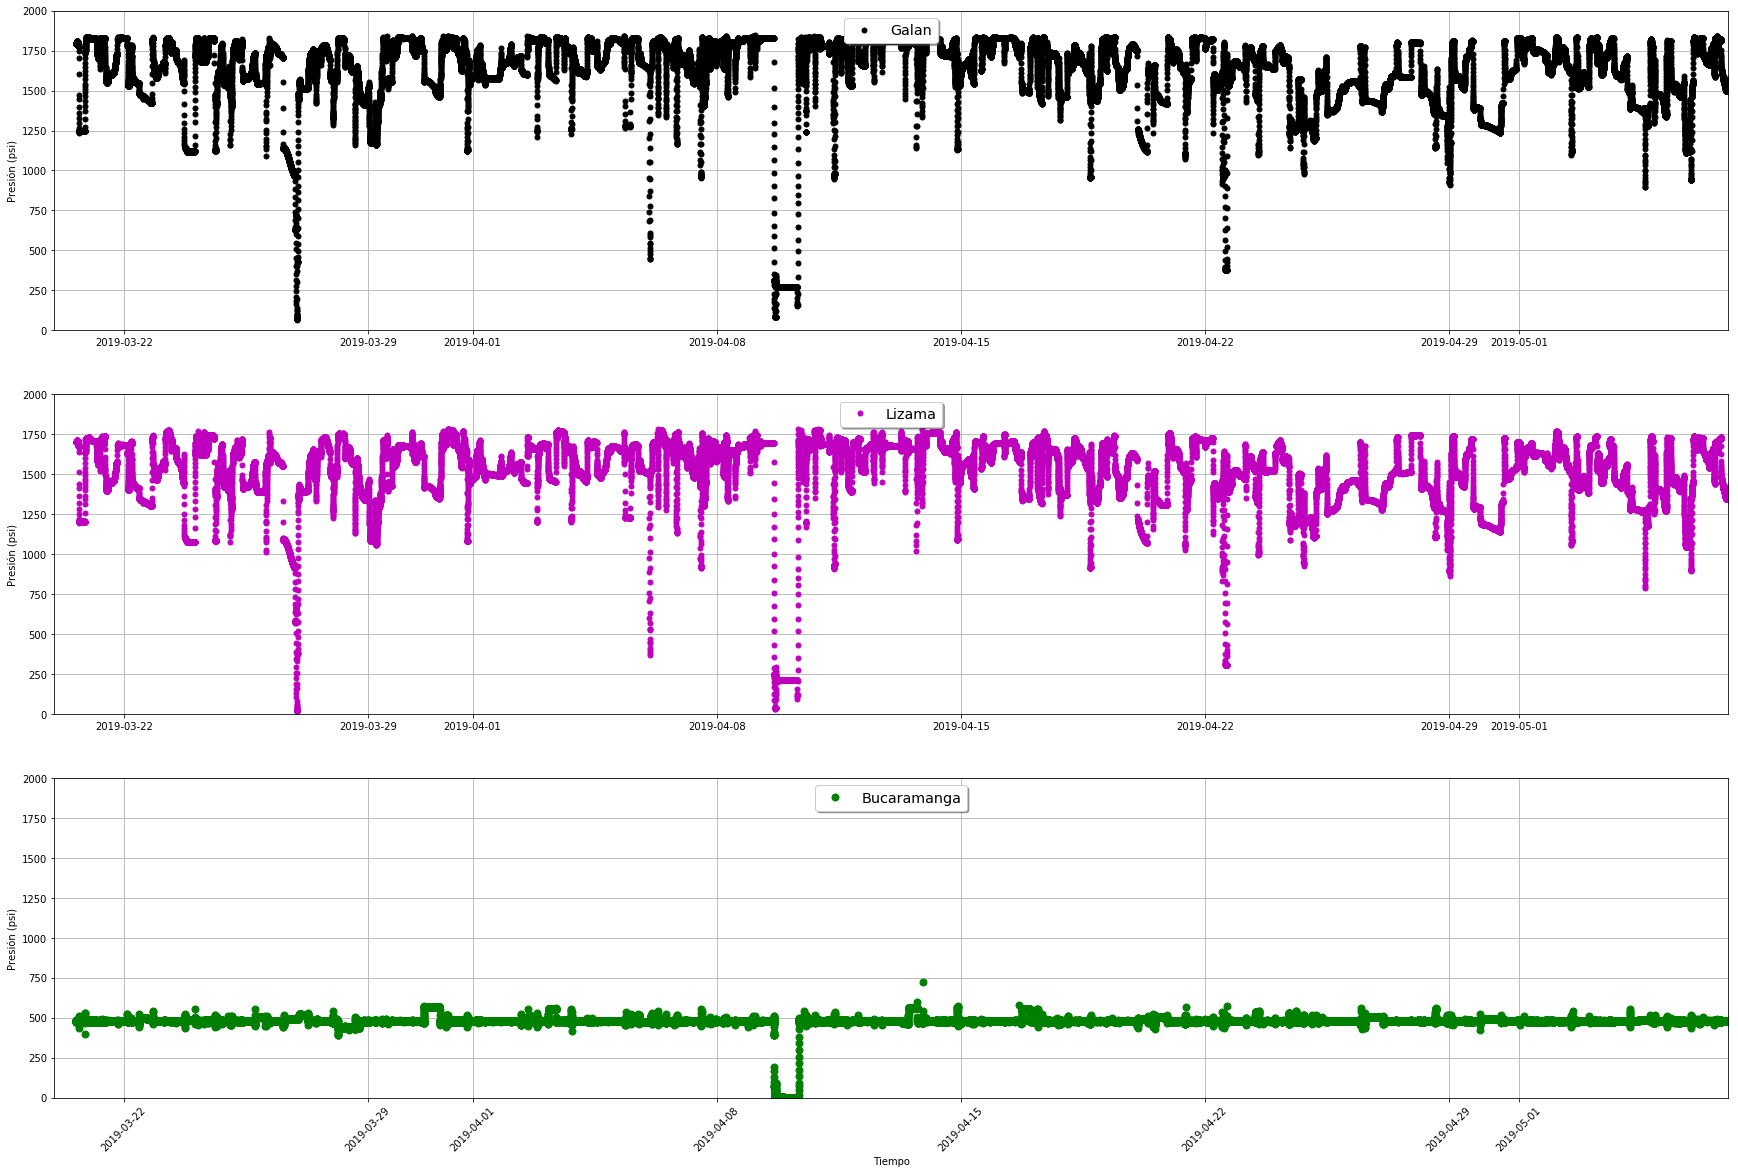

In [72]:
#https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html
import datetime

headers = data1.dtypes.index

plt.figure(figsize=(30, 20))

ax1 = plt.subplot(311)
plt.plot(data1.iloc[:,[0]], data1.iloc[:,[6]], 'o',markersize=5,color="k")
plt.ylim(0, 2000)
plt.grid(True)
plt.ylabel('Presión (psi)')
plt.legend(['Galan'], loc='upper center', fontsize='x-large', shadow=True)

ax2 = plt.subplot(312, sharex=ax1)
plt.plot(data1.iloc[:,[0]], data1.iloc[:,[9]], 'o',markersize=5,color="m")
plt.ylim(0, 2000)
plt.grid(True)
plt.ylabel('Presión (psi)')
plt.legend(['Lizama'], loc='upper center', fontsize='x-large', shadow=True)

ax3 = plt.subplot(313, sharex=ax1)
plt.plot(data1.iloc[:,[0]], data1.iloc[:,[14]], 'o',markersize=7,color="g")
plt.ylim(0, 2000)
plt.grid(True)
plt.ylabel('Presión (psi)')


plt.xlabel('Tiempo')
plt.xlim([datetime.date(2019, 3, 20), datetime.date(2019, 5, 7)])
plt.xticks(rotation=45)

plt.legend(['Bucaramanga'], loc='upper center', fontsize='x-large', shadow=True)
plt.savefig('Presion.png')
plt.show()
plt.close()

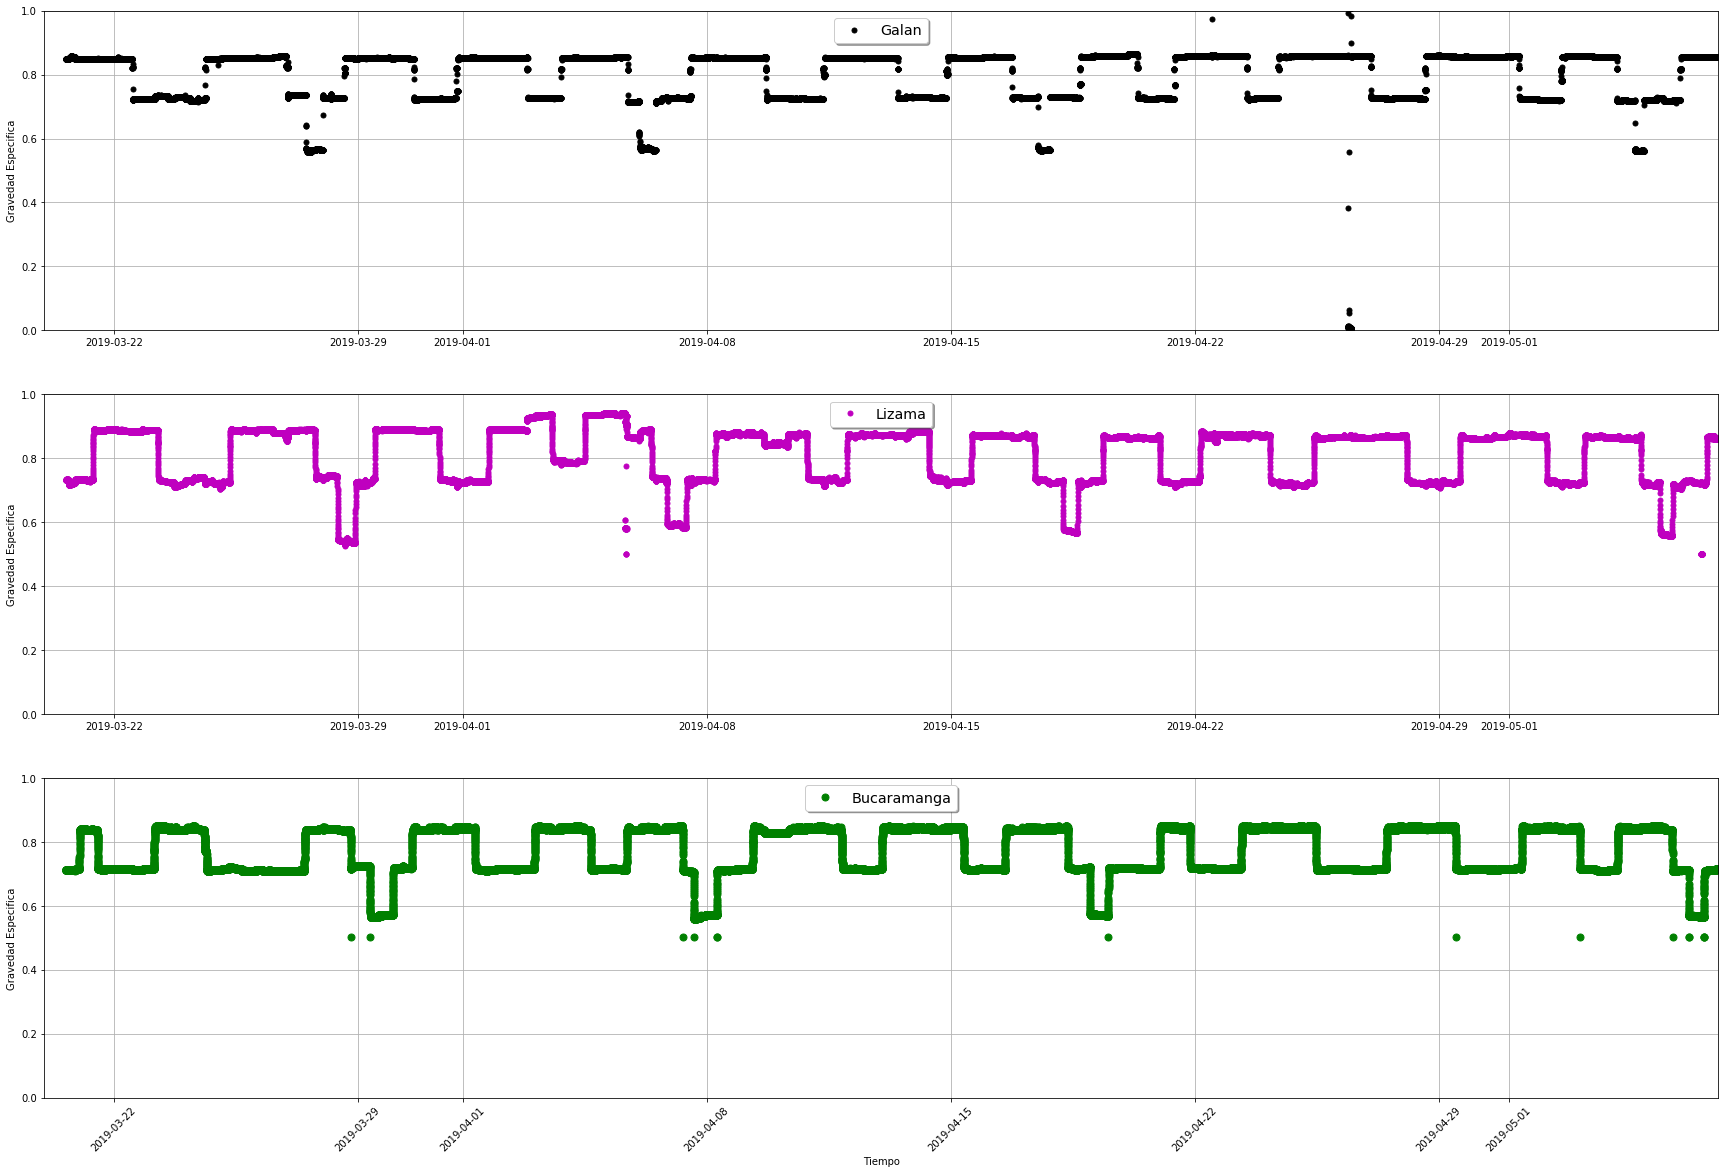

In [73]:
#https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html
import datetime

headers = data1.dtypes.index

plt.figure(figsize=(30, 20))

ax1 = plt.subplot(311)
plt.plot(data1.iloc[:,[0]], data1.iloc[:,[3]], 'o',markersize=5,color="k")
plt.ylim(0, 1)
plt.grid(True)
plt.ylabel('Gravedad Especifica')
plt.legend(['Galan'], loc='upper center', fontsize='x-large', shadow=True)

ax2 = plt.subplot(312, sharex=ax1)
plt.plot(data1.iloc[:,[0]], data1.iloc[:,[7]], 'o',markersize=5,color="m")
plt.ylim(0, 1)
plt.grid(True)
plt.ylabel('Gravedad Especifica')
plt.legend(['Lizama'], loc='upper center', fontsize='x-large', shadow=True)

ax3 = plt.subplot(313, sharex=ax1)
plt.plot(data1.iloc[:,[0]], data1.iloc[:,[12]], 'o',markersize=7,color="g")
plt.ylim(0, 1)
plt.grid(True)
plt.ylabel('Gravedad Especifica')


plt.xlabel('Tiempo')
plt.xlim([datetime.date(2019, 3, 20), datetime.date(2019, 5, 7)])
plt.xticks(rotation=45)

plt.legend(['Bucaramanga'], loc='upper center', fontsize='x-large', shadow=True)
plt.savefig('SG.png')
plt.show()
plt.close()

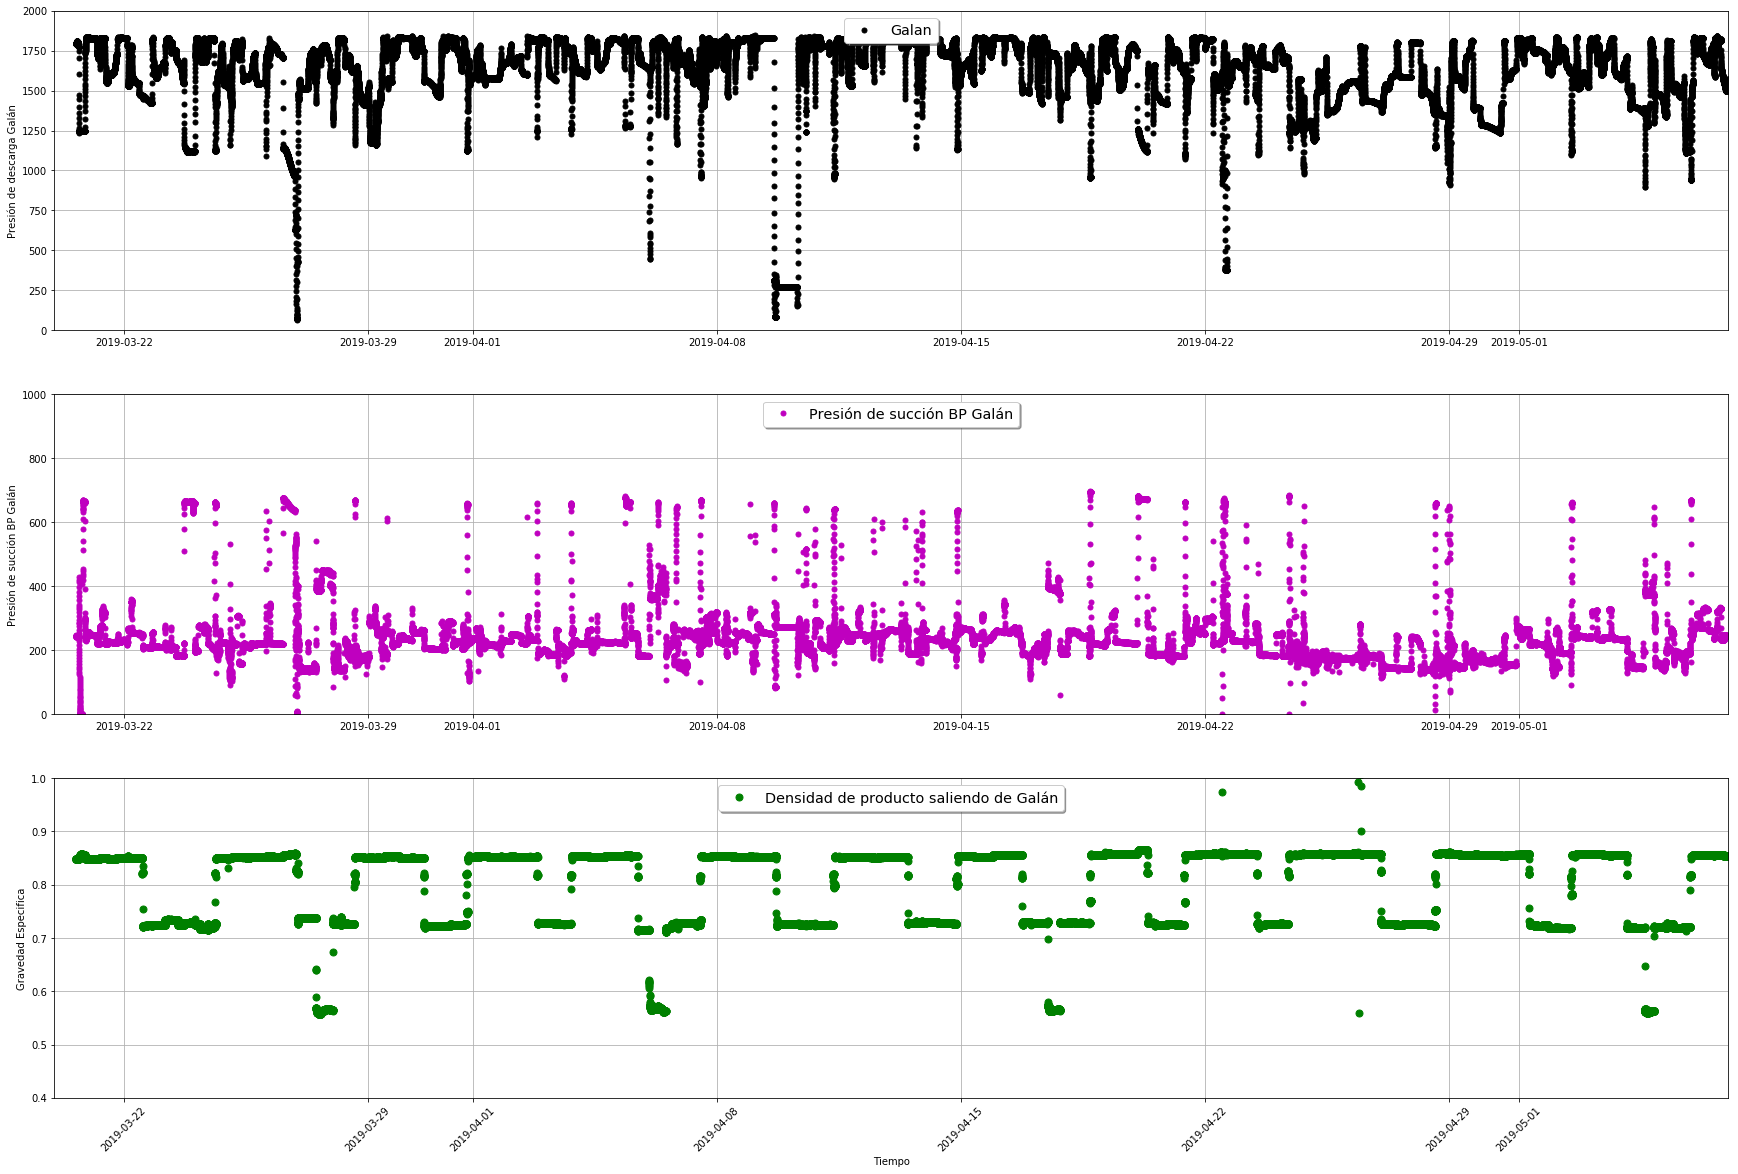

In [8]:
#https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html
import datetime

headers = data1.dtypes.index

plt.figure(figsize=(30, 20))

ax1 = plt.subplot(311)
plt.plot(data1.iloc[:,[0]], data1.iloc[:,[6]], 'o',markersize=5,color="k")
plt.ylim(0, 2000)
plt.grid(True)
plt.ylabel('Presión de descarga Galán')
plt.legend(['Galan'], loc='upper center', fontsize='x-large', shadow=True)

ax2 = plt.subplot(312, sharex=ax1)
plt.plot(data1.iloc[:,[0]], data1.iloc[:,[5]], 'o',markersize=5,color="m")
plt.ylim(0, 1000)
plt.grid(True)
plt.ylabel('Presión de succión BP Galán')
plt.legend(['Presión de succión BP Galán'], loc='upper center', fontsize='x-large', shadow=True)

ax3 = plt.subplot(313, sharex=ax1)
plt.plot(data1.iloc[:,[0]], data1.iloc[:,[3]], 'o',markersize=7,color="g")
plt.ylim(0.4, 1)
plt.grid(True)
plt.ylabel('Gravedad Especifica')


plt.xlabel('Tiempo')
plt.xlim([datetime.date(2019, 3, 20), datetime.date(2019, 5, 7)])
plt.xticks(rotation=45)

plt.legend(['Densidad de producto saliendo de Galán'], loc='upper center', fontsize='x-large', shadow=True)
plt.savefig('DescargavssuccionGalan.png')
plt.show()
plt.close()